In [2]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import stat
import numpy as np

In [3]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

<Figure size 720x504 with 0 Axes>

In [4]:
df = pd.read_csv("../dataset/dataset.csv")
df

Path  Label  Note
0    DSC_2701.jpg      3   NaN
1    DSC_2702.jpg      3   NaN
2    DSC_2704.jpg      4   NaN
3    DSC_2706.jpg      4   NaN
4    DSC_2703.jpg      4   NaN
..            ...    ...   ...
150      J030.jpg      2   NaN
151      J033.jpg      2   NaN
152      J036.jpg      2   NaN
153      J037.jpg     12   NaN
154      J038.jpg      4   NaN

[155 rows x 3 columns]

In [5]:
print(len(df['Label']))

155


In [6]:
switch = {
    1: "Suknelė",
    2: "Švarkas",
    3: "Trumpas topas",
    4: "Ilgas topas",
    5: "Sijonas",
    6: "Suknele be rankovių",
    7: "Skarelė",
    8: "Paltas",
    9: "Striuke",
    10: "Marškiniai",
    11: "Kelnės"
}

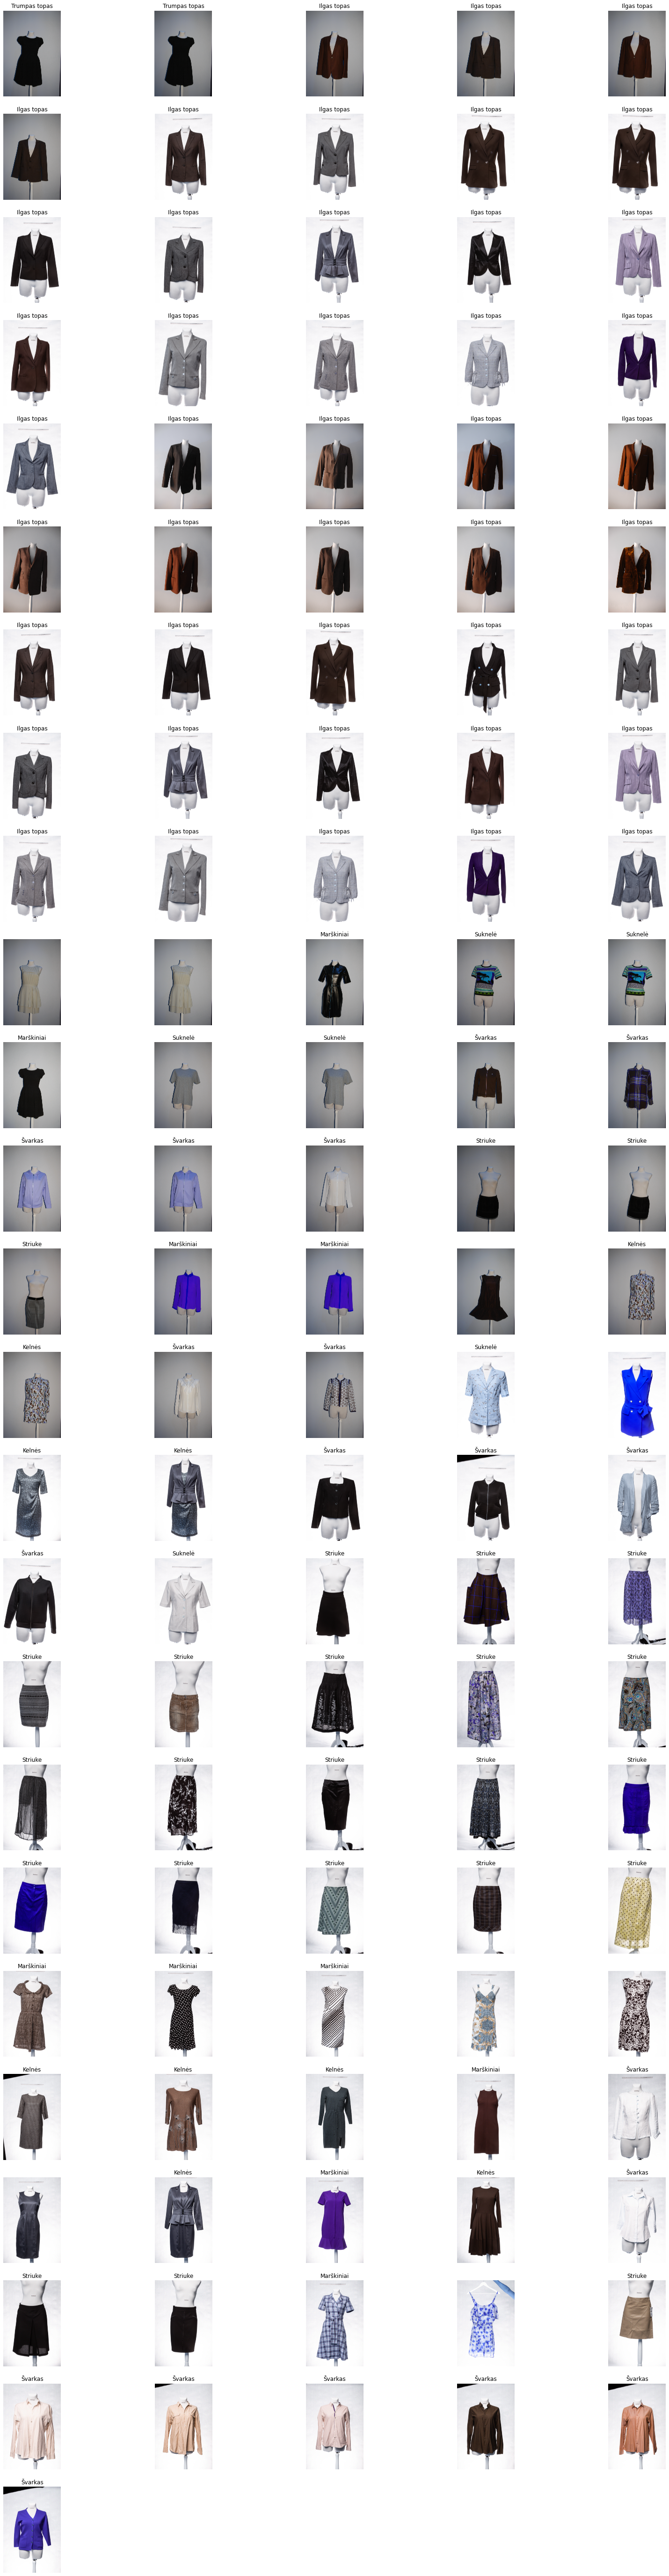

In [7]:
# max 122
 
skip = 0
load = 121
columns = 5

fig = plt.figure(figsize=(28, load))

rows = int(load / 4)

for i in range(load):
    index = i + skip
    fig.add_subplot(rows, columns, index + 1)
    plt.imshow(cv2.imread("../dataset/imgs/" + df['Path'][index]))
    plt.axis('off')
    plt.title(switch.get(int(df['Label'][index])))

In [8]:
df2 = df.loc[df['Label'].isin([2])]

In [9]:
df1 = df.loc[df['Label'].isin([1])]

In [10]:
#dfsel.to_csv('data1.csv')

In [11]:
# clean directories and create new files
current_directory = os.getcwd()
final_directory = os.path.join(current_directory, 'img1')
if os.path.exists(final_directory):
    shutil.rmtree(final_directory)
os.makedirs(final_directory)

current_directory = os.getcwd()
final_directory = os.path.join(current_directory, 'img2')
if os.path.exists(final_directory):
    shutil.rmtree(final_directory)
os.makedirs(final_directory)

In [12]:
for i in range(len(df1)):
    shutil.copy('../dataset/imgs/' + df1.iloc[i]['Path'], 'img1/')

In [13]:
for i in range(len(df2)):
    shutil.copy('../dataset/imgs/' + df2.iloc[i]['Path'], 'img2/')

In [14]:
###Point addition to data

Text(0.5, 1.0, 'Suknelė')

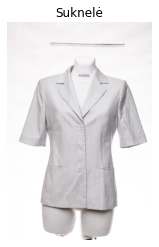

In [15]:
index = 5
im_cv = cv2.imread("img1/" + df1['Path'].iloc[index])
im_rgb = cv2.cvtColor(im_cv, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.axis('off')
plt.title(switch.get(int(df1['Label'].iloc[index])))


In [16]:
img = im_cv

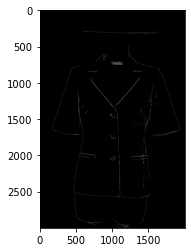

In [21]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
norm_image = cv2.normalize(edges, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(norm_image, cmap='gray', vmin=0, vmax=255)


In [1]:
edges = cv2.Canny(img, 100, 200)
edges = (edges - np.min(edges)) / (np.max(edges) - np.min(edges))
plt.imshow(norm_image, cmap='gray', vmin=0, vmax=255)

NameError: name 'cv2' is not defined

In [19]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
